اضافه کردن کتابخانه ها

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

خواندن مجموعه داده

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

شناسایی داده های پرت در ستون age

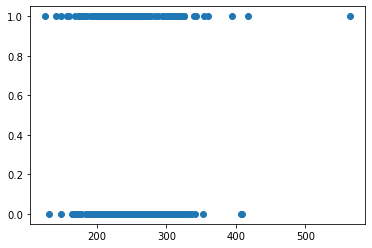

In [4]:
plt.scatter(df['chol'], df['target'])

حذف داده های پرت در ستون age

In [5]:
q_low = df["chol"].quantile(0.01)
q_hi  = df["chol"].quantile(0.97)
df = df[(df["chol"] < q_hi) & (df["chol"] > q_low)]

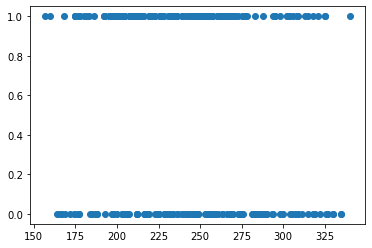

In [6]:
plt.scatter(df['chol'], df['target'])

شناسایی داده های پرت در ستون trestbps

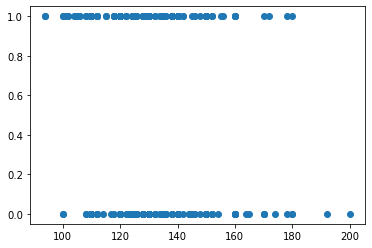

In [7]:
plt.scatter(df['trestbps'], df['target'])

حذف داده های پرت در ستون trestbps

In [8]:
q_low = df["trestbps"].quantile(0.02)
q_hi  = df["trestbps"].quantile(0.97)
df = df[(df["trestbps"] < q_hi) & (df["trestbps"] > q_low)]

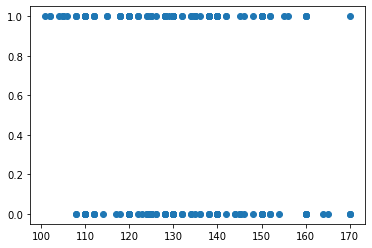

In [9]:
plt.scatter(df['trestbps'], df['target'])

شناسایی داده های پرت در ستون thalach

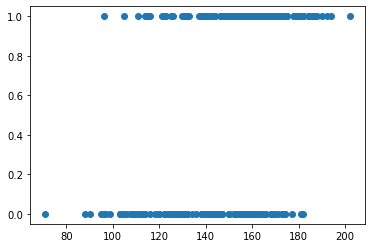

In [10]:
plt.scatter(df['thalach'], df['target'])

حذف داده های پرت در ستون thalach

In [11]:
q_low = df["thalach"].quantile(0.03)
q_hi  = df["thalach"].quantile(0.99)
df = df[(df["thalach"] < q_hi) & (df["thalach"] > q_low)]

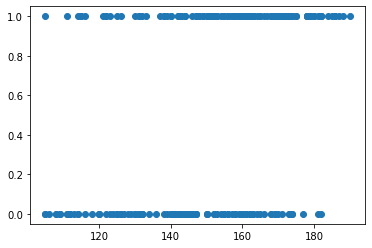

In [12]:
plt.scatter(df['thalach'], df['target'])

بررسی متعادل بودن کلاس تارگت

In [13]:
df['target'].value_counts()

1    145
0    115
Name: target, dtype: int64

جدا کردن داده های ورودی و خروجی مدل

In [14]:
X = df.drop('target', axis=1)
y = df['target']

تقسیم داده ها به داده های آموزش و تست

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from scipy.stats import multivariate_normal as mvn
class GNB(object):
    
    def fit(self, X, Y):
        self.gaussians=dict()
        self.priors=dict()
        labels=set(Y)
        for c in labels:
            current_x=X[Y==c]
            self.gaussians[c]={
                'mean':current_x.mean(axis=0),
                'var': current_x.var(axis=0)
            }
            self.priors[c]=float(len(Y[Y==c]))/len(Y)
        return self.gaussians

        
    def predict(self, X, gaussians):
        N, D = X.shape
        K=len(self.gaussians)
        P=np.zeros((N,K))
        for c, g in gaussians.items():
            mean, var = g['mean'], g['var']
            P[:,c]=mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
        return np.argmax(P, axis=1)
        

In [17]:
gnb_clf = GNB()
g = gnb_clf.fit(X_train[['chol','thalach', 'trestbps']], y_train)

In [18]:
prediction = gnb_clf.predict(X_test[['chol','thalach', 'trestbps']], g)

In [19]:
from sklearn.metrics import f1_score, recall_score, precision_score
print('f1_score:gnb: ', f1_score(y_test, prediction))
print('precision:gnb: ', precision_score(y_test, prediction))
print('recall:gnb: ', recall_score(y_test, prediction))

f1_score:gnb:  0.7719298245614035
precision:gnb:  0.7333333333333333
recall:gnb:  0.8148148148148148


In [20]:
from sklearn.naive_bayes import GaussianNB
gnb1_clf = GaussianNB()
gnb1_clf.fit(X_train[['chol','thalach', 'trestbps']], y_train)

GaussianNB()

In [21]:
prediction = gnb1_clf.predict(X_test[['chol','thalach', 'trestbps']])

In [22]:
print('f1_score:gnb: ', f1_score(y_test, prediction))
print('precision:gnb: ', precision_score(y_test, prediction))
print('recall:gnb: ', recall_score(y_test, prediction))

f1_score:gnb:  0.7719298245614035
precision:gnb:  0.7333333333333333
recall:gnb:  0.8148148148148148


In [23]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train[['chol','thalach', 'trestbps']], y_train)

SVC()

In [24]:
prediction = svm_clf.predict(X_test[['chol','thalach', 'trestbps']])

In [25]:
print('f1_score:svm: ', f1_score(y_test, prediction))
print('precision:svm: ', precision_score(y_test, prediction))
print('recall:svm: ', recall_score(y_test, prediction))

f1_score:svm:  0.7868852459016393
precision:svm:  0.7058823529411765
recall:svm:  0.8888888888888888


In [26]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train[['chol','thalach', 'trestbps']], y_train)

SVC()

In [27]:
prediction = svm_clf.predict(X_test[['chol','thalach', 'trestbps']])

In [28]:
print('f1_score:svm: ', f1_score(y_test, prediction))
print('precision:svm: ', precision_score(y_test, prediction))
print('recall:svm: ', recall_score(y_test, prediction))

f1_score:svm:  0.7868852459016393
precision:svm:  0.7058823529411765
recall:svm:  0.8888888888888888


In [29]:
svm_clf = SVC(kernel='sigmoid')
svm_clf.fit(X_train[['chol','thalach', 'trestbps']], y_train)

SVC(kernel='sigmoid')

In [30]:
prediction = svm_clf.predict(X_test[['chol','thalach', 'trestbps']])

In [31]:
print('f1_score:svm: ', f1_score(y_test, prediction))
print('precision:svm: ', precision_score(y_test, prediction))
print('recall:svm: ', recall_score(y_test, prediction))

f1_score:svm:  0.6835443037974684
precision:svm:  0.5192307692307693
recall:svm:  1.0


In [32]:
svm_clf = SVC(kernel='poly')
svm_clf.fit(X_train[['chol','thalach', 'trestbps']], y_train)

SVC(kernel='poly')

In [33]:
prediction = svm_clf.predict(X_test[['chol','thalach', 'trestbps']])

In [34]:
print('f1_score:svm: ', f1_score(y_test, prediction))
print('precision:svm: ', precision_score(y_test, prediction))
print('recall:svm: ', recall_score(y_test, prediction))

f1_score:svm:  0.7272727272727273
precision:svm:  0.7142857142857143
recall:svm:  0.7407407407407407


In [35]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [36]:
prediction = svm_clf.predict(X_test)

In [37]:
print('f1_score:svm: ', f1_score(y_test, prediction))
print('precision:svm: ', precision_score(y_test, prediction))
print('recall:svm: ', recall_score(y_test, prediction))

f1_score:svm:  0.7164179104477612
precision:svm:  0.6
recall:svm:  0.8888888888888888


In [38]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X)

5

In [39]:
for train_index, test_index in kf.split(X, y):    
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [40]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [41]:
prediction = svm_clf.predict(X_test)

In [42]:
print('f1_score:svm: ', f1_score(y_test, prediction))
print('precision:svm: ', precision_score(y_test, prediction))
print('recall:svm: ', recall_score(y_test, prediction))

f1_score:svm:  0.7142857142857143
precision:svm:  0.5681818181818182
recall:svm:  0.9615384615384616


In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
prediction = knn_clf.predict(X_test)

In [45]:
print('f1_score:knn: ', f1_score(y_test, prediction))
print('precision:knn: ', precision_score(y_test, prediction))
print('recall:knn: ', recall_score(y_test, prediction))

f1_score:knn:  0.6440677966101696
precision:knn:  0.5757575757575758
recall:knn:  0.7307692307692307


In [46]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
prediction = knn_clf.predict(X_test)

In [47]:
print('f1_score:knn: ', f1_score(y_test, prediction))
print('precision:knn: ', precision_score(y_test, prediction))
print('recall:knn: ', recall_score(y_test, prediction))

f1_score:knn:  0.6557377049180327
precision:knn:  0.5714285714285714
recall:knn:  0.7692307692307693


In [48]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)
prediction = knn_clf.predict(X_test)

In [49]:
print('f1_score:knn: ', f1_score(y_test, prediction))
print('precision:knn: ', precision_score(y_test, prediction))
print('recall:knn: ', recall_score(y_test, prediction))

f1_score:knn:  0.7419354838709676
precision:knn:  0.6388888888888888
recall:knn:  0.8846153846153846


In [50]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train[['chol', 'trestbps', 'thalach']], y_train)
prediction = knn_clf.predict(X_test[['chol', 'trestbps', 'thalach']])

In [51]:
print('f1_score:knn: ', f1_score(y_test, prediction))
print('precision:knn: ', precision_score(y_test, prediction))
print('recall:knn: ', recall_score(y_test, prediction))

f1_score:knn:  0.6666666666666667
precision:knn:  0.6129032258064516
recall:knn:  0.7307692307692307


In [52]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train[['chol', 'trestbps', 'thalach']], y_train)
prediction = knn_clf.predict(X_test[['chol', 'trestbps', 'thalach']])

In [53]:
print('f1_score:knn: ', f1_score(y_test, prediction))
print('precision:knn: ', precision_score(y_test, prediction))
print('recall:knn: ', recall_score(y_test, prediction))

f1_score:knn:  0.6779661016949152
precision:knn:  0.6060606060606061
recall:knn:  0.7692307692307693
